In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,8]
import scipy.io as sc

In [4]:
# [Optional]
# This package allows to visualize the progress during a loop and estimate the remaining time of execution
# If you don't want to install it, please search for pbar = tqdm(total = t_max), pbar.update(1) and pbar.close() 
#code lines and delete them

from tqdm import tqdm_notebook as tqdm

# <font color='color'> Introduction </font>

# <font color='color'> Question 1 : theoretical study
 </font>


### <font color='color'> MAP estimation on NMF </font>


We consider the following probabilistic non-negative matrix factorization (NMF) model:
    
For $f=1,\dots,F, n=1,\cdots,N, k=1,\dots,K$,
\begin{align*}
w_{fk} &\sim \mathcal{G}(w_{fk};\alpha_w,\beta_w)\\
h_{kn} &\sim \mathcal{G}(h_{kn};\alpha_h,\beta_h)\\
v_{fn} | w_{f,:},h_{:,n} &\sim \mathcal{PO} \left(v_{fn} ; \sum_{k=1}^K w_{fk}h_{kn} \right)
\end{align*}


where :

* $\mathcal{G}$ denotes the Gamma distribution and $\mathcal{PO}$ denotes the Poisson distribution.

* $w_{f,:}$ denotes the collection $\{w_{fk}\}_{k=1}^K$, and $h_{:,n}$ denotes the collection $\{h_{:,n}\}_{n=1}^N$.

The directed graphical model is the following : 
![alt text](https://raw.githubusercontent.com/AymenMT/Bayesian_NMF_For_Image_Processing/master/graph1.PNG)

#### <font color='color'> Derivation of the EM algorithm </font>

The Expectation-Maximization algorithm aims to find the maximum a-posteriori estimate (MAP), defined
as follows:

$$(W^*,H^*) = \underset{W,H}{\operatorname{argmax}} \{ \log p(W,H|V) \}$$

Before making our calculations for the E-step and the M-step, we define :

* Random variable $v_{fn}$ such as : $V=[v_{fn}]_{f,n}$

* Random variable $w_{fk}$ such as : $W = [w_{fk}]_{f,k}$

* Random variable $h_{kn}$ such as : $H = [h_{kn}]_{k,n}$

Such as $v_{fn}$, $w_{fk}$ and $h_{kn}$ follow the NMF model described above, and :

* the hidden variable $S=[s_{fnk}]_{f,n,k}$ such as : $v_{f,n} = \sum_{i=1}^K s_{fnk}$, $\Longrightarrow s_{fnk} | w_{f,:},h_{:,n} \sim \mathcal{PO} \left(s_{fnk} ; w_{fk}h_{kn} \right)$

The new graphical is the following : 

![alt text](https://raw.githubusercontent.com/AymenMT/Bayesian_NMF_For_Image_Processing/master/graph2.PNG)

With hyper-parameters $(\alpha_w, \beta_w)$ on W, and  $(\alpha_h, \beta_h)$ on H.

### <font color='color'> E-step </font>

During this step, we aim to calculate : 

$$ \mathcal{L}_t(W,H) = \mathbb{E}[ \log(p(V,S,W,H))]_{p(S|V,W_t,H_t)}$$

####  <font color='color'> $p(S|V,W,H)  = \log(p(V|S, W, H)) + \log(p(S|W,H)) - \log(p(V|W,H)) $ </font>

* $\log(p(V|S, W, H)) = \sum_{f,n} \log(p(v_{fn}|s_{fnk}, w_{fk}, h_{kn}))\\ = \sum_{f,n} \log(p(\sum_{i=1}^K s_{fnk}|s_{fnk}, w_{fk}, h_{kn}))\\ = \sum_{f,n} \log \left(\delta \left(v_{fn} - \sum_k s_{fnk} \right) \right)$


* $\log(p(S|W,H)) = \sum_{f,n,k} s_{fnk} \log (w_{fk}h_{kn}) - w_{fk}h_{kn} - \log \Gamma(s_{fnk} + 1)$, knowing that $ s_{fnk} | w_{f,:},h_{:,n} \sim \mathcal{PO} \left(s_{fnk} ; w_{fk}h_{kn} \right)$


* $ \log(p(V|W,H)) =  \sum_{f,n} \left( v_{fn} \log \left(\sum_k w_{fk}h_{kn} \right) - \sum_k w_{fk}h_{kn} - \log\left(\Gamma\left(\sum_k s_{fnk}+1\right)\right) \right)$, knowing that $ v_{fn} | w_{f,:},h_{:,n} \sim \mathcal{PO} \left(v_{fn} ; \sum_{k=1}^K w_{fk}h_{kn} \right)$


Using those expressions, we find : 

\begin{align*}
\log(p(S|V,W,H)) &= \sum_{f,n,k} s_{fnk} \log(w_{fk}h_{kn}) - \log(\Gamma(s_{fnk}+1)) - \sum_{f,n} \sum_k s_{fnk} \log \left(\sum_k w_{fk}h_{kn}\right) + \sum_{f,n} \log \left(\Gamma\left(v_{fn} +1\right)\right) \\
 &= \sum_{f,n,k} [s_{fnk}  \log(\frac{w_{fk}h_{kn}}{\sum_k w_{fk}h_{kn}}) - \log(\Gamma(s_{fnk}+1)) ]+ \sum_{f,n} \log \left(\Gamma\left(v_{fn} +1\right)\right) \\
 &= \sum_{f,n,k} [s_{fnk}  \log(\pi_{fnk}) - \log(s_{fnk}!) ]+ \sum_{f,n} \log(v_{fn}!) \\
 &= \sum_{f,n} log \mathcal{M}(s_{fn1},\dots,s_{fnK}| v_{fn},\pi_{f,n,1},\dots,\pi_{f,n,K})
\end{align*}

$$ \boxed{p(S|V,W_t,H_t) \sim \prod_{f,n} \mathcal{M}(s_{fn1},\dots,s_{fnK}| v_{fn},\pi_{f,n,1},\dots,\pi_{f,n,K})} $$


with $$\boxed{\pi_{f,n,k} = \frac{w_{fk}h_{kn}}{\sum_k w_{fk}h_{kn}} = \frac{w_{fn}h_{nk}}{\hat{v}_{fn}}}$$


####  <font color='color'> $\log(p(V,S,W,H)) = ? $ </font>

Following he graphical model, we have : 

$$ P(V,S,W,H)= P(V|S) P(S|W,H) P(W) P(H)$$

So, we have : $ \log P(V,S,W,H)= \log P(S|W,H) + \log P(W) + \log P(H) $ 


<br> $ \Longrightarrow \log P(V,S,W,H)= \sum_{f,n,k} \log \mathcal{PO}(s_{fnk}; w_{nk}h_{kn})+\sum_{f,k} \log \mathcal{G}(w_{fk},\alpha_w,\beta_w)+\sum_{k,n} \log \mathcal{G}(h_{kn},\alpha_h,\beta_h)$

<br>
<br>
<br>
* $ \log p(W) = \sum_{f,k} (\alpha_w -1)\log(w_{fk}) + \alpha_w \log(\beta_w) - \beta_w w_{fk} - \log(\Gamma(\alpha_w))$


* $ \log p(H) = \sum_{k,n} (\alpha_h-1)\log(h_{kn}) + \alpha_h \log(\beta_h) - \beta_h h_{kn} - \log(\Gamma(\alpha_h))$


* $\log(p(S|W,H)) = \sum_{f,n,k} s_{fnk} \log (w_{fk}h_{kn}) - w_{fk}h_{kn} - \log \Gamma(s_{fnk} + 1)$


<br> $ \Longrightarrow \log P(V,S,W,H)=\sum_{f,n,k} (-w_{fk}h_{kn}+s_{fnk}\log (w_{fk}h_{kn}) - \log \Gamma (s_{fnk}+1)) + \sum_{f,k} (\alpha_w -1)\log(w_{fk}) + \alpha_w \log(\beta_w) - \beta_w w_{fk} - \log(\Gamma(\alpha_w)) + \sum_{k,n} (\alpha_h-1)\log(h_{kn}) + \alpha_h \log(\beta_h) - \beta_h h_{kn} - \log(\Gamma(\alpha_h))$

####  <font color='color'> $\mathcal{L}_t(W,H) = \mathbb{E}[ \log(p(V,S,W,H))]_{p(S|V,W_t,H_t)}$ </font>

since $p(S|V,W_t,H_t) \sim \prod_{f,n} \mathcal{M}(s_{fn1},\dots,s_{fnK}| v_{fn},\pi_{fn1}^{(t)},\dots,\pi_{fnK}^{(t)})$, we get : $$\mathbb{E}[s_{fnk}]_{p(S|V,W_t,H_t)} = v_{fn} \pi_{fnK}^{(t)} = v_{fn}\frac{w_{fk}^{(t)}h_{kn}^{(t)}}{\sum_i w_{fi}^{(t)}h_{in}^{(t)}} = v_{fn}\frac{w_{fk}^{(t)}h_{kn}^{(t)}}{\hat{v}_{fn}^{(t)}}$$

<br>
<br>

Thus, as we are interesting on the maximization of the term under $W$ and $H$, we keep only the terms which depend on $W$ and $H$ :

\begin{align*}
\mathcal{L}_t(W,H) &\sim \sum_{f,n,k} \left[v_{fn} \frac{w_{fk}^{(t)}h_{kn}^{(t)}}{\hat{v}_{fn}^{(t)}}\log(w_{fk}h_{kn}) - w_{fk}h_{kn} \right] + \sum_{f,k} (\alpha_w-1)\log(w_{fk}) - \beta_w w_{fk}\\
&+ \sum_{k,n} (\alpha_h-1) \log(h_{kn}) - \beta_h h_{kn}
\end{align*}

### <font color='color'> M-step </font>

Let us derivate $\mathcal{L}_t$ with respect to $w_{fi}$.
\begin{align*}
\frac{\partial \mathcal{L}_t}{\partial w_{fi}} &= \sum_n \left[v_{fn} \frac{w_{fi}^{(t)}h_{in}^{(t)}}{\hat{v}_{fn}^{(t)}} \frac{h_{in}}{w_{fi}h_{in}} - h_{in}^{(t)} \right] + \frac{\alpha_w-1}{w_{fi}} - \beta_w \\
&= \frac{1}{w_{fi}} \left[\sum_n \left( v_{fn} \frac{w_{fi}^{(t)}h_{in}^{(t)}}{\hat{v}_{fn}^{(t)}} \right) + \alpha_w - 1 \right] - \beta_w - \sum_n h_{in}^{(t)}
\end{align*}
The equality $\frac{\partial \mathcal{L}_t}{\partial w_{fi}} = 0$ yields :
$$ \boxed{w_{fi}^{(t+1)} = \frac{w_{fi}^{(t)} \sum_n \frac{v_{fn}}{\hat{v}_{fn}^{(t)}} {h_{in}^{(t)}} + \alpha_w -1}{\beta_w + \sum_n h_{in}^{(t)}}}$$


And the derivative of $\mathcal{L}_t$ with respect to $h_{in}$  :

\begin{align*}
\frac{\partial \mathcal{L}_t}{\partial h_{in}} &= \left( \sum_f \frac{v_{fn}}{\hat{v}_{fn}^{(t)}} w_{fi}^{(t)} \right) h_{in}^ {(t)} \frac{1}{h_{in}} - \sum_i w_{fi}^{(t)} + \frac{\alpha_h-1}{h_{in}} - \beta_h \\
&= \frac{1}{h_{in}} \left[ \left( \sum_f {w_{fi}^{(t)}} \frac{v_{fn}}{\hat{v}_{fn}^{(t)}}\right) h_{in}^{(t)} + \alpha_h -1 \right] + \sum_f w_{fi}^{(t)} - \beta_h
\end{align*}

The equality $\frac{\partial \mathcal{L}_t}{\partial h_{in}} = 0$ yields :
$$ \boxed{h_{in}^{(t+1)} = \frac{{h_{in}^{(t)}} \sum_{f} \frac{v_{fn}}{\hat{v}_{fn}^{(t)}} w_{fi}^{(t)} + \alpha_h - 1}{\beta_h + \sum_f w_{fi}^{(t)}}}$$

# <font color='color'> Question 2.1 : Implementation
 </font>


1. According to the previous calculus, implementation may be written as follow:


* Update $W$ : $W^{(t+1)} \leftarrow \frac{W^{(t)} \odot (V \oslash \hat{V}^{(t)}){H^{(t)}}^\top + (\alpha_w-1)I }{\beta_w I + (IH^\top)}$, with $I$ (F x N), $I_{fn}=1$.

In [5]:
def update_w(V, W, H, K, hyperpar):
    """ 
    This function insures the update of W
    
    input :
    V : the real matrix : dtype = array(F*N)
    W : W matrix at step t-1 : dtype = array(F*K)
    H : H matrix at step t-1 : dtype = array(K*N)
    K : the required number of columns of W : dtype = int
    hyperpar : a dictionnary of hyper-parameters : dtype = dict
    
    Output : 
    W : updated W matrix at step t : dtype = array(F*K)
    """
    matrix_mult = W * np.dot(np.divide(V, np.dot(W,H)) , H.T)
    new_W = (matrix_mult + hyperpar['alpha_w'] - 1) / (hyperpar['beta_w'] + np.dot(np.ones((F,N)), H.T))
    return(new_W)

* Update $H$ : $H^{(t+1)} \leftarrow \frac{{H^{(t)}}^\top(V \oslash \hat{V}^{(t)})^\top  H^{(t)} + (\alpha_h -1)I}{\beta_h I +  I^\top W^{(t)}} $.

In [6]:
def update_h(V, W, H, K, hyperpar):
    """ 
    This function insures the update of H
    
    input :
    V : the real matrix : dtype = array(F*N)
    W : W matrix at step t-1 : dtype = array(F*K)
    H : H matrix at step t-1 : dtype = array(K*N)
    K : the required number of columns of W : dtype = int
    hyperpar : a dictionnary of hyper-parameters : dtype = dict
    
    Output : 
    H : updated H matrix at step t : dtype = array(K*N)
    """
    matrix_mult = H.T * np.dot(np.divide(V, np.dot(W,H)).T , W)
    new_H = (matrix_mult + hyperpar['alpha_h'] - 1) / (hyperpar['beta_h'] + np.dot(np.ones((N,F)), W))
    return(new_H.T)

### <font color='color'> Stopping criterion </font>


Before implementing the EM algorithm, we define a stopping criterion which is defined by a maximum number of iterations $t_{max}$ or a threshold based on the variation of kullback leibler distance between $V$ and $\hat{V}$.
In fact, the purpose is to find  we have $W$ and $H$ such as $\hat{V}$ is close to $V$. We can use the kullback leibler distance to measure how far is $\hat{V}$ from $V$. 

$$ \underset{W,H}{\operatorname{argmin}} \{ KL(V||\hat{V}) \} = \underset{W,H}{\operatorname{argmin}} \{ - \sum_{i,j} v_{ij} \log \hat{v_{ij}} - \hat{v_{ij}}  \} = \underset{W,H}{\operatorname{argmax}} \{ \log [ \sum_{i,j} v_{ij} \log \hat{v_{ij}} - \hat{v_{ij}}] \}$$

We added the log due to computational issues. During the algorithm, and after each step, we calculate the distance between $\hat{V}^{(t)}$ and $V$. If this distance is very close to the one calculated during the previous step, we assume that we have convergence.  


In [7]:
def EM_algorithm(V, K, hyperpar, init, t_max, norm_min):
    """ 
    EM algorithm
    
    input :
    V : the real matrix : dtype = array(F*N)
    K : the required number of columns of W : dtype = int
    hyperpar : a dictionnary of hyper-parameters : dtype = dict
    init : a dictionnary containing the initializations of W and H : dtype = dict
    t_max : the maximum number of iterations, dtype=int
    norm_min : threshold of the evolution of KL distance, dtype=int
    
    Output : 
    W : estimated W matrix : dtype = array(F*K)
    H : estimated H matrix : dtype = array(K*N)
    KL_vect : the evolution of KL distance during the algorithm : dtype = list
    """
    K = 25
    F = V.shape[0]
    N = V.shape[1]
    W = init['W']
    H = init['H']
    pbar = tqdm(total = t_max)
    t = 0
    verif = True
    KL_vect = [0]
    while (t<t_max) and (verif):

        H_new = update_h(V, W, H, K, hyperpar)
        W_new = update_w(V, W, H, K, hyperpar)
        
        V_tilde = np.dot(W_new,H_new)
        kl = np.log(np.sum(V*np.log(V_tilde) - V_tilde))
        if np.sum(np.isnan(kl)) == 0:
            if np.abs(KL_vect[-1] - kl) < norm_min:
                verif = False
            KL_vect.append(kl)
        H = H_new
        W = W_new
        pbar.update(1)
        t+=1
        
    pbar.close()
    return(W, H, KL_vect)

# <font color='color'> Question 2.2 : Tests
 </font>


### <font color='color'> Loading Data
 </font>


In [8]:
data = sc.loadmat("attfaces.mat")

In [9]:
V = data['V']

In [10]:
def transform_data(V, row_number):
    """ 
    This function insures the transformation of a set of the data to images
    
    input :
    V : the real matrix : dtype = array(F*N)
    row_number : the required row of images to visualize, dtype = int
    
    Output : 
    faces_matrix : transformation of a set of the data to images : dtype = array(row_number*112 ,92*20)
    """
    faces_matrix = V[:,0].reshape((92,112)).T
    
    # First images row
    for _ in range(1,20):
        faces_matrix = np.append(faces_matrix, V[:,_].reshape((92,112)).T, axis=1)
    
    # Other images rows
    for i in np.arange(20,20*(row_number),20):
        v = V[:,i].reshape((92,112)).T
        for _ in range(i+1,i+20):
            v = np.append(v, V[:,_].reshape((92,112)).T, axis=1)
        faces_matrix = np.append(faces_matrix, v, axis=0)
    return(faces_matrix)


### <font color='color'> Visualize as sample from the data
 </font>


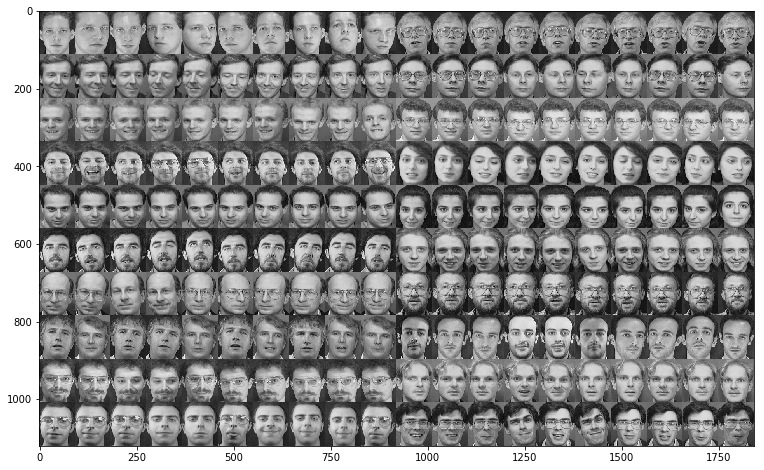

In [60]:
row_number = 10
faces_matrix = transform_data(V, row_number)
imgplot = plt.imshow(faces_matrix, cmap='gray')
plt.show()

### <font color='color'> Testing EM Algorithm
 </font>


We apply our algorithm on the face dataset provided by the $AT\&T$ Database of Faces. This dataset contains face images from 40 different people, and there are 10 images for each subject. In total, there are 400 images in the dataset, and the size of each image is $92 \times 112$.

<br>
The goal of the experiment is to obtain a 'parts-based-representation' of faces by learning an NMF model on this
dataset. Our hope is that, when we estimate the matrices $W$ and $H$ by using $V$ , the columns of $W$ will correspond
to some images that only contain a particular part of a face.

<br>
First, we set K = 25, $\alpha_w = \alpha_h = 1$ and we try different values for  $\beta_w$ and $\beta_h$ :  $(\beta_w, \beta_h) = (0.1,0.1), (20,20), (200,200)$ 

### Note : We consider here $\beta_w$ and $\beta_h$ as the rate of the gamma law

In [11]:
K = 25
F = V.shape[0]
N = V.shape[1]
t_max = 1000
norm_min = 0.00005

#####  1)     $\alpha_w = \alpha_h = 1$ and $(\beta_w, \beta_h) = (0.1,0.1)$ 

In [67]:
hyperpar = {'alpha_w':1, 'alpha_h':1, 'beta_w':0.1, 'beta_h':0.1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W1, H1, KL1 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

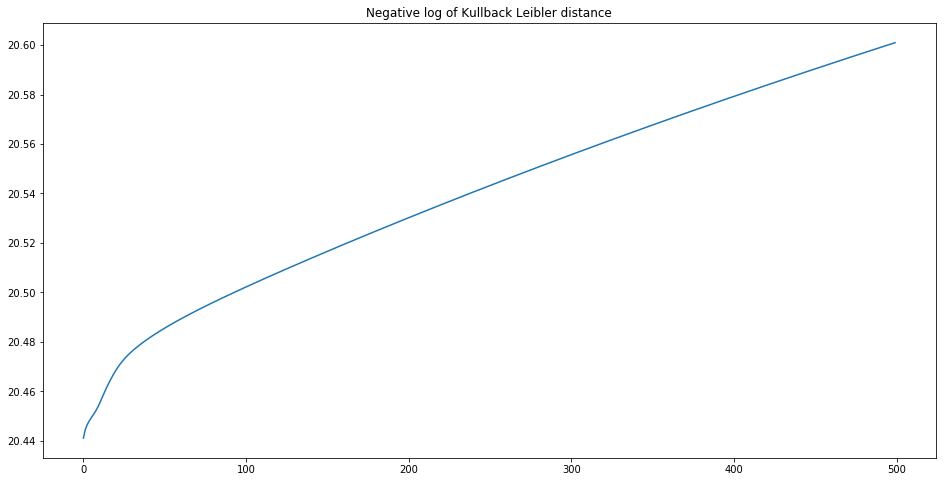

In [68]:
plt.plot(range(len(KL1)-1),KL1[1:])
plt.title('Negative log of Kullback Leibler distance')

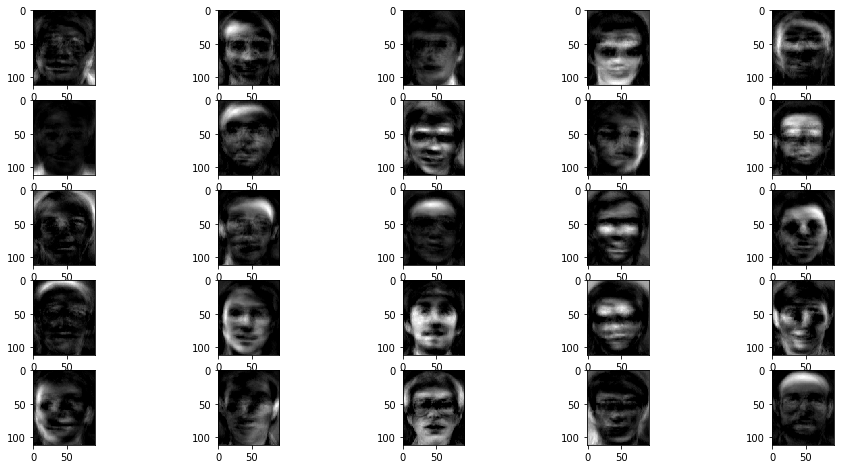

In [69]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W1[:,_-1].reshape((92,112))).T, cmap='gray')
plt.show()

#####  2)     $\alpha_w = \alpha_h = 1$ and $(\beta_w, \beta_h) = (20,20)$ 

In [70]:
hyperpar = {'alpha_w':1, 'alpha_h':1, 'beta_w':20, 'beta_h':20}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W2, H2, KL2 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

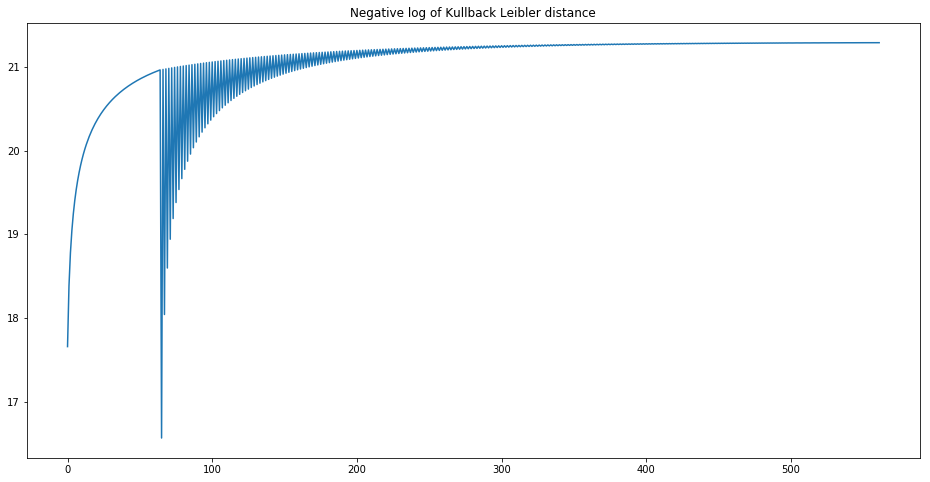

In [71]:
plt.plot(range(len(KL2)-1),KL2[1:])
plt.title('Negative log of Kullback Leibler distance')

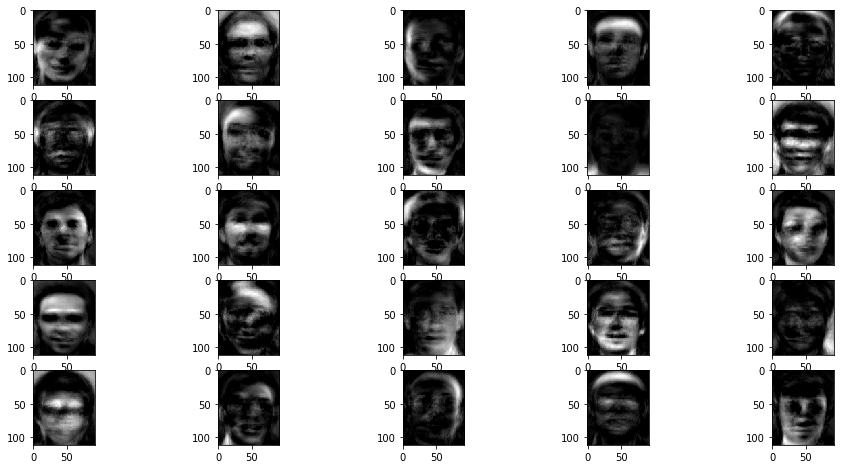

In [72]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W2[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

#####  3)     $\alpha_w = \alpha_h = 1$ and $(\beta_w, \beta_h) = (200,200)$ 

In [76]:
hyperpar = {'alpha_w':1, 'alpha_h':1, 'beta_w':200, 'beta_h':200}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W3, H3, KL3 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

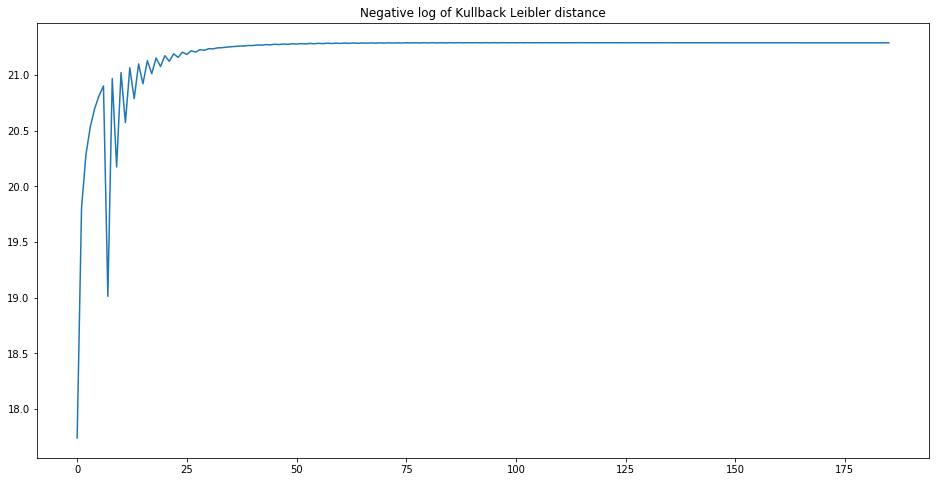

In [79]:
plt.plot(range(len(KL3)-1),KL3[1:])
plt.title('Negative log of Kullback Leibler distance')

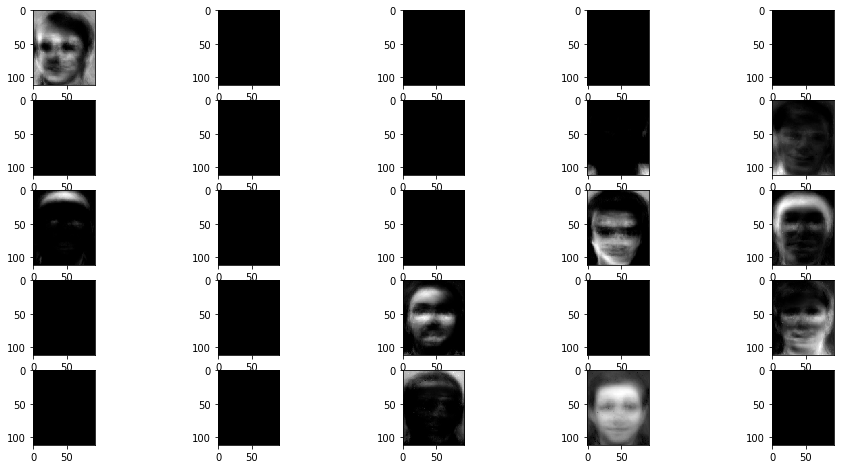

In [80]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W3[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

We can see that, the more $\beta$ is bigger, the more the images have missing parts.

In order to explain the difference between our plots when we change the parameter $\beta$, we need to remember that that a Gamma law has a mean equal to $\frac{\alpha}{\beta}$ and a standard deviation equal to $\frac{\sqrt{\alpha}}{\beta}$. 

<br>
When we fix $\alpha$, if $\beta$ is large, the mean and the variance are close to zero. That gives a high probability of zero coefficient. So the matrix obtained with this law is sparse. In contrast, the lower $\beta$ is, the lower is the probability of 0, so representations will be full.

<br>
We can see this effect on the faces images. When we have increased $\beta$, with a fixed $\alpha$, the images became dark. That correponds to a low values of W. We can deduce that $\beta$ should'nt be large. We plot above the image corresponding to a null matrix : 


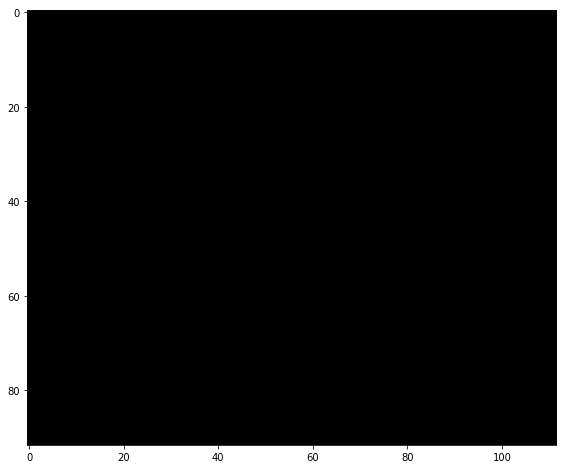

In [118]:
imgplot = plt.imshow(np.zeros((92,112)), cmap=plt.cm.gray)
plt.show()

Another way to verify if we have sparse matrix is to compare the sum of elements of W after the 3 experiences. We excpect to find $\sum_{i,j} W3_{i,j} <<  \sum_{i,j} W1_{i,j}$

In [111]:
np.sum(W1) - np.sum(W3)

1953507.4686548458

We can see clearly the difference, knowing that both of W1 and W3 converged

### Now, we try to fix $\beta$ and to change $\alpha$. We set K = 25, $\beta_w = \beta_w = 1$ and we try different values for  $\alpha_w$ and $\alpha_h$ :  $(\alpha_w, \alpha_h) = (0.1,0.1), (20,20), (200,200)$ 

#####  4)     $\beta_w = \beta_h = 1$ and $(\alpha_w, \alpha_h) = (0.1,0.1)$ 

In [110]:
hyperpar = {'alpha_w':0.1, 'alpha_h':0.1, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W4, H4, KL4 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


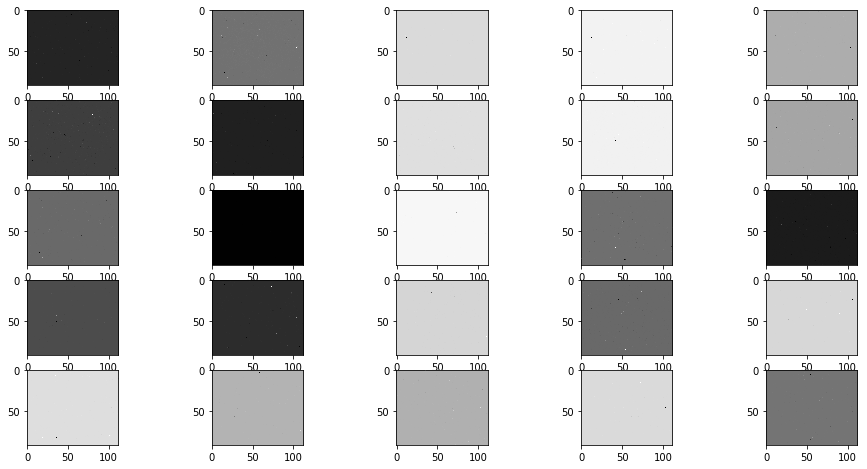

In [112]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow(W4[:,_-1].reshape((92,112)), cmap=plt.cm.gray)
plt.show()

#####  5)     $\beta_w = \beta_h = 1$ and $(\alpha_w, \alpha_h) = (20,20)$ 

In [114]:
hyperpar = {'alpha_w':20, 'alpha_h':20, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W5, H5, KL5 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

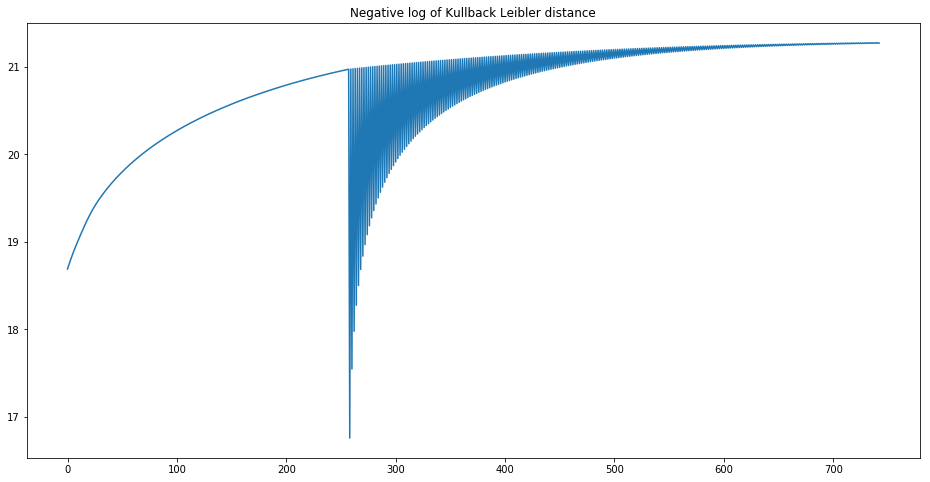

In [119]:
plt.plot(range(len(KL5)-1),KL5[1:])
plt.title('Negative log of Kullback Leibler distance')

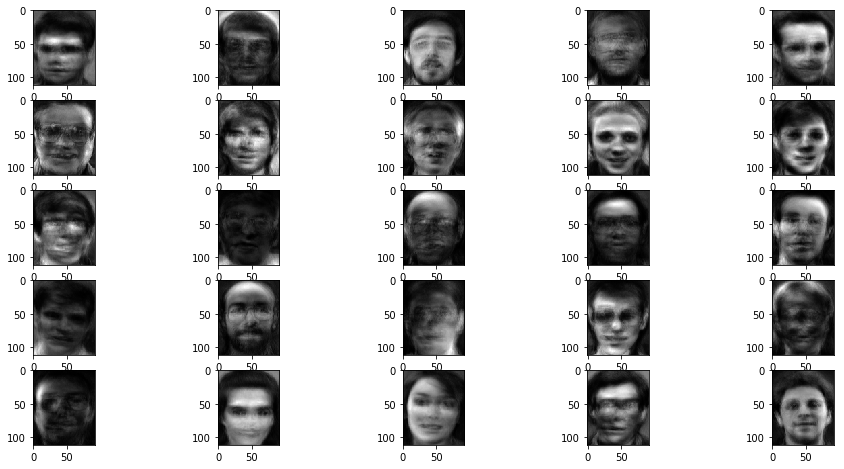

In [120]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W5[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

#####  6)     $\beta_w = \beta_h = 1$ and $(\alpha_w, \alpha_h) = (200,200)$ 

In [121]:
hyperpar = {'alpha_w':200, 'alpha_h':200, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W6, H6, KL6 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

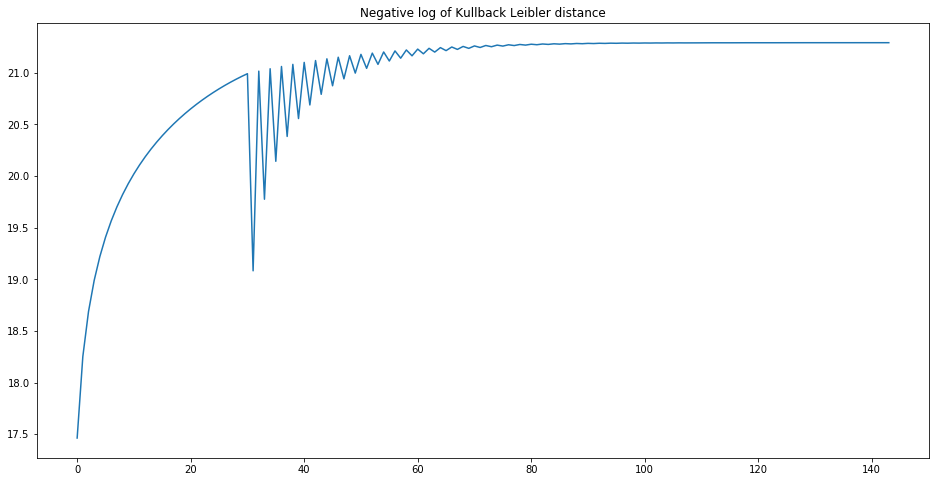

In [122]:
plt.plot(range(len(KL6)-1),KL6[1:])
plt.title('Negative log of Kullback Leibler distance')

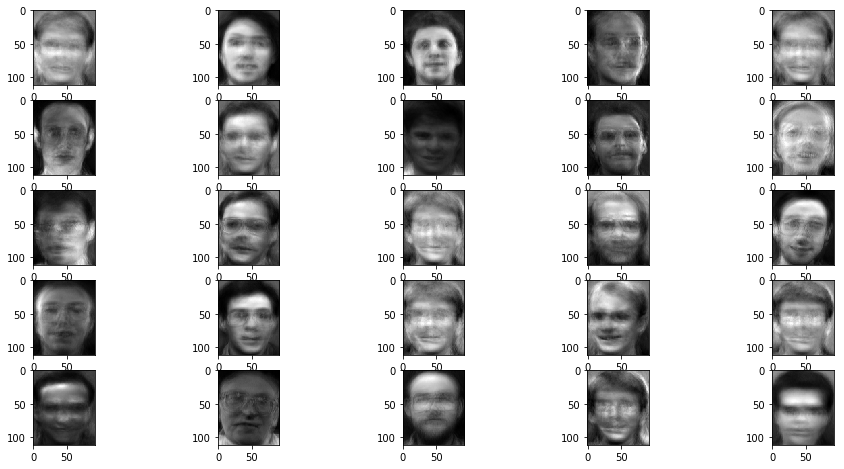

In [123]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W6[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

As discussed below, a Gamma law has a mean equal to $\frac{\alpha}{\beta}$ and a standard deviation equal to $\frac{\sqrt{\alpha}}{\beta}$. 
We can see here that If α is close to zero, most of the variables will be close to zero too. In our case, $\alpha_w $and/or $\alpha_h$ close to zero creates W and/or H which are sparse matrix. We conclude then that we must not set both $\alpha$ parameters close to zero.

### <font color='color'> Changing paramter K
 </font>


#####  7)     $\alpha_w = \alpha_h = 10$ , $ \beta_w = \beta_h = 1$ and $K = 1$

In [44]:
K = 1
hyperpar = {'alpha_w':10, 'alpha_h':10, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W7, H7, KL7 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


Text(0.5,1,'Negative log of Kullback Leibler distance')

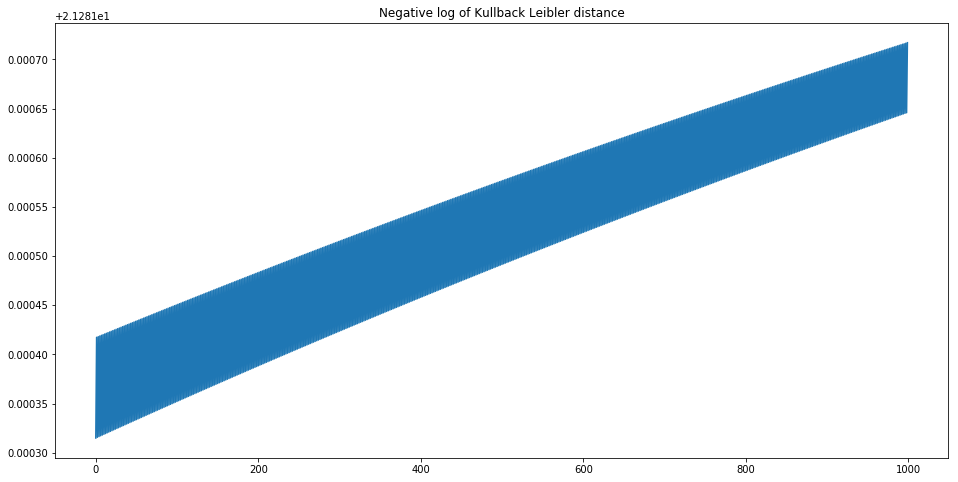

In [45]:
plt.plot(range(len(KL7)-1),KL7[1:])
plt.title('Negative log of Kullback Leibler distance')

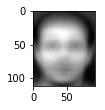

In [46]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W7[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

#####  8)     $\alpha_w = \alpha_h = 10$ , $ \beta_w = \beta_h = 1$ and $K = 10$

In [47]:
K = 10
hyperpar = {'alpha_w':10, 'alpha_h':10, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W8, H8, KL8 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

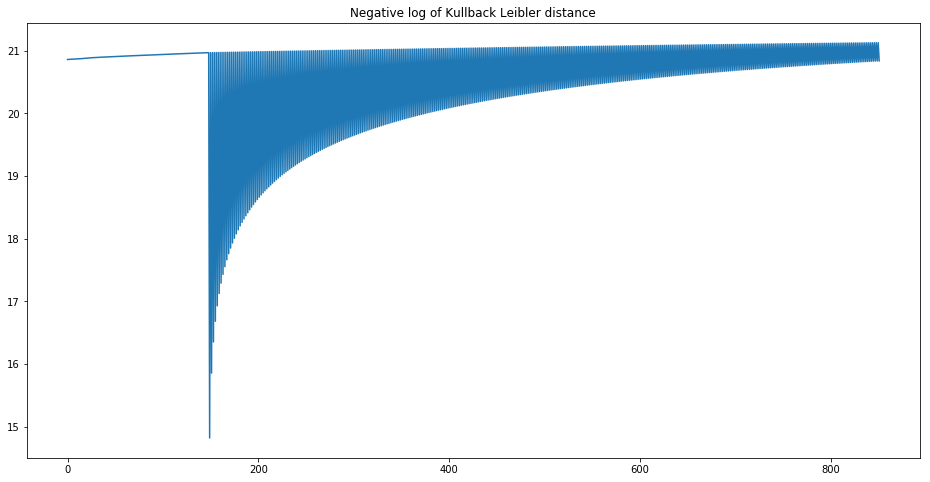

In [48]:
plt.plot(range(len(KL8)-1),KL8[1:])
plt.title('Negative log of Kullback Leibler distance')

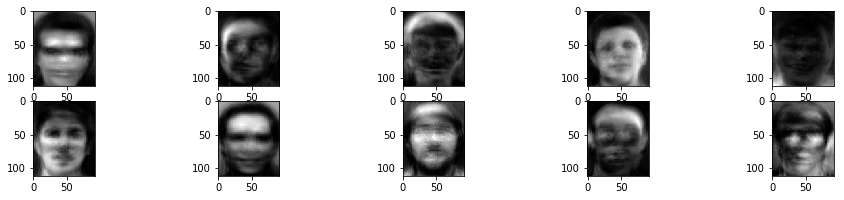

In [49]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W8[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

#####  9)     $\alpha_w = \alpha_h = 10$ , $ \beta_w = \beta_h = 1$ and $K = 25$

In [50]:
K = 25
hyperpar = {'alpha_w':10, 'alpha_h':10, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W9, H9, KL9 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

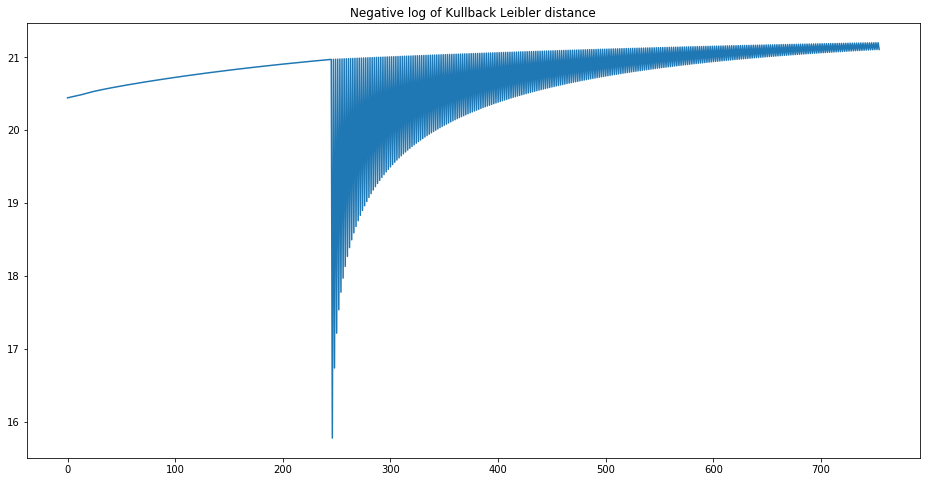

In [51]:
plt.plot(range(len(KL9)-1),KL9[1:])
plt.title('Negative log of Kullback Leibler distance')

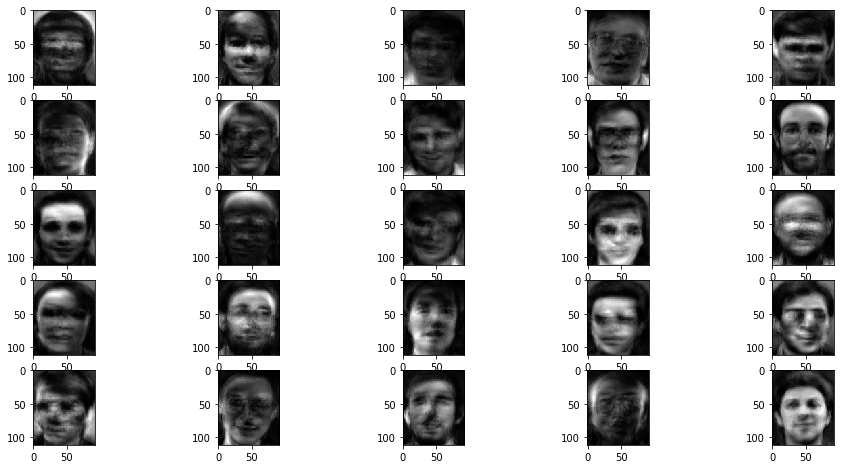

In [52]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(5,5,_)  
    imgplot = plt.imshow((W9[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

#####  10)     $\alpha_w = \alpha_h = 10$ , $ \beta_w = \beta_h = 1$ and $K = 50$

In [53]:
K = 50
hyperpar = {'alpha_w':10, 'alpha_h':10, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W10, H10, KL10 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

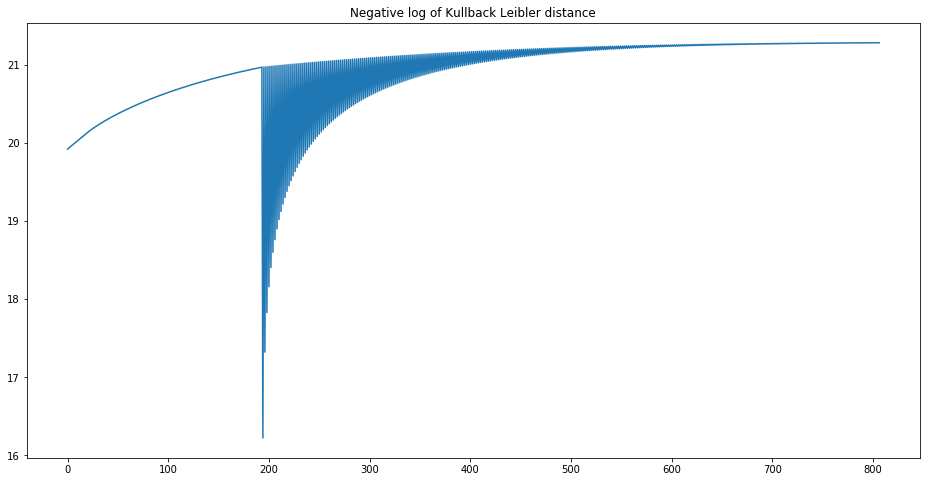

In [54]:
plt.plot(range(len(KL10)-1),KL10[1:])
plt.title('Negative log of Kullback Leibler distance')

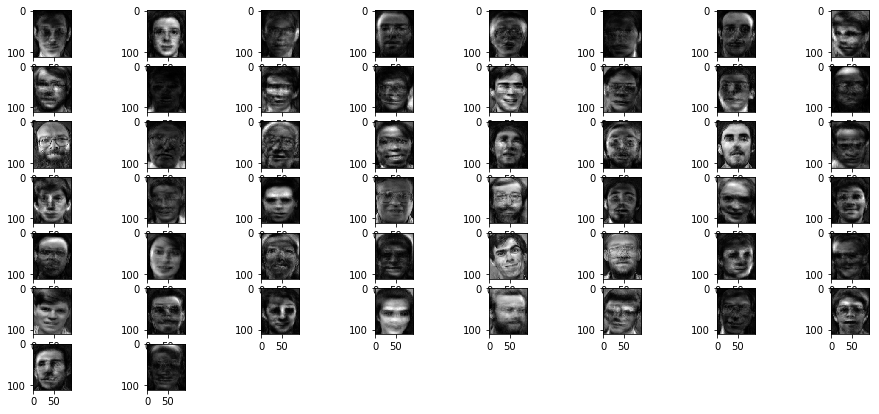

In [55]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(8,8,_)  
    imgplot = plt.imshow((W10[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

#####  11)     $\alpha_w = \alpha_h = 10$ , $ \beta_w = \beta_h = 1$ and $K = 100$

In [56]:
K = 100
hyperpar = {'alpha_w':10, 'alpha_h':10, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W11, H11, KL11 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'Negative log of Kullback Leibler distance')

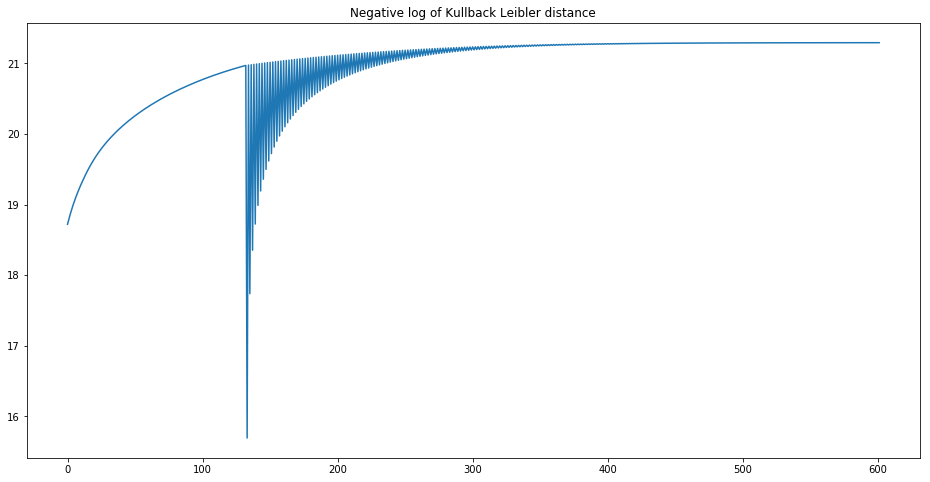

In [57]:
plt.plot(range(len(KL11)-1),KL11[1:])
plt.title('Negative log of Kullback Leibler distance')

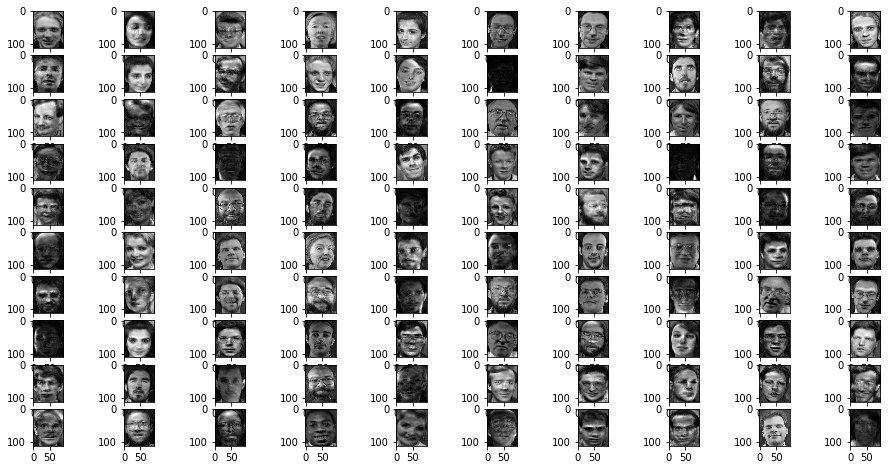

In [60]:
oFig1 = plt.figure(1)
for _ in range(1,K+1): 
    oFig1.add_subplot(10,10,_)  
    imgplot = plt.imshow((W11[:,_-1].reshape((92,112))).T, cmap=plt.cm.gray)
plt.show()

In practice, the factorization rank $K$ is often chosen such that $ K << min(N, F)$. The objective behind this choice is to summarize and split the information contained in $V$ into $K$ factors: the columns of $W$.

<br>
We can see here that $K$ influences the estimation of the matrix $W$. We can see that ** with a good choice of $alpha$ and $beta$ **, higher is $K$ better is the estimation. It is necessary to find a compromise between the complicity of the model (and thus a high K) and the quality of the estimate (by decreasing excessively K).

<br>
To verify this interpretation, we use the sklearn function which is based on KL-divergence minimization (without priors), thanks to its rapidity of execution. We try different values of K (from 5 to 195) and we plot the KL-divergence in function of K.

In [85]:
import numpy as np
from sklearn.decomposition import NMF
r = []
for _ in tqdm(np.arange(5,200,5)):
    model = NMF(n_components=_, init='random', random_state=0)
    W = model.fit_transform(V)
    H = model.components_
    r.append((_, model.reconstruction_err_ ))

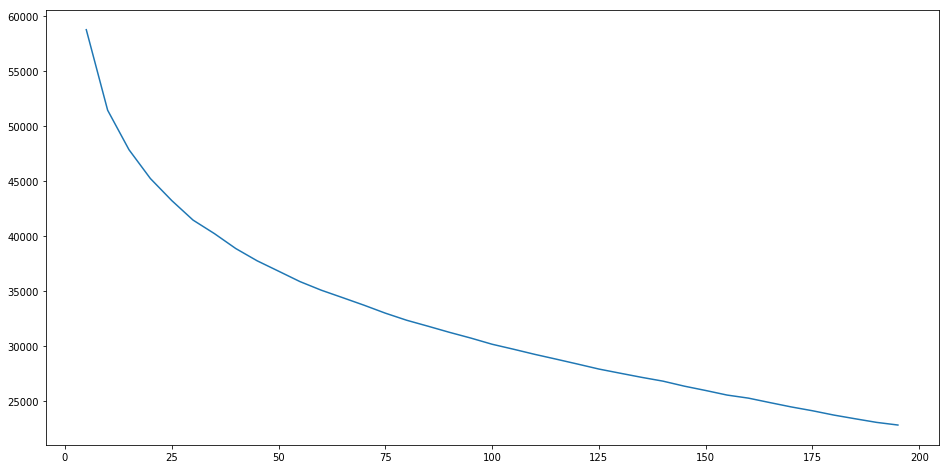

In [92]:
kl_res = [_[1] for _ in r]
plt.plot(np.arange(5,200,5), kl_res)

In [93]:
r[np.argmin(kl_res)]

(195, 22825.219311618624)

##### We can see here that the best K (which minimizes KL-divergence) is the biggest one. 

### <font color='color'> Visualize $\tilde{V}$ for $\alpha_w = \alpha_h = 10$ , $ \beta_w = \beta_h = 1$ and $K = 50$
 </font>


In [88]:
K = 50
norm_min = 0.0005
hyperpar = {'alpha_w':10, 'alpha_h':10, 'beta_w':1, 'beta_h':1}
W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
init = {'W':W, 'H':H}
W11, H11, KL11 = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)


C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


In [89]:
V_tilde = np.dot(W11,H11)

Text(0.5,1,'Negative log of Kullback Leibler distance')

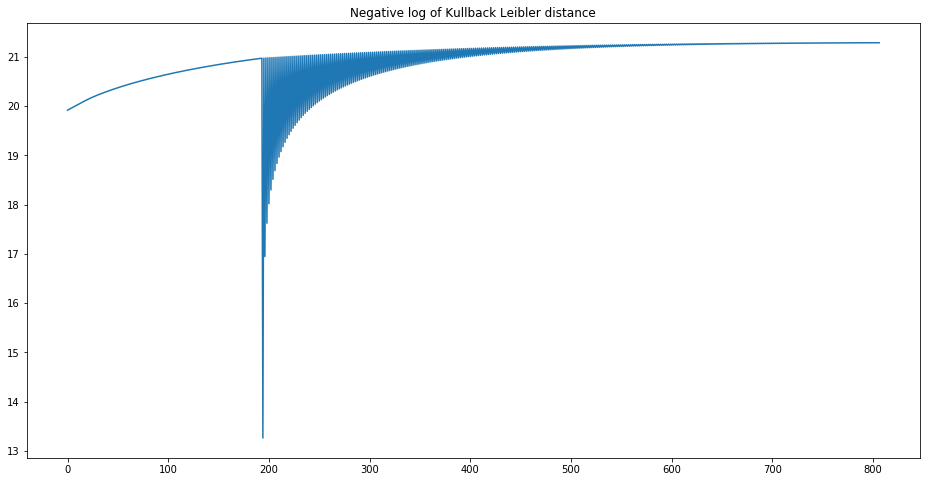

In [90]:
plt.plot(range(len(KL11)-1),KL11[1:])
plt.title('Negative log of Kullback Leibler distance')

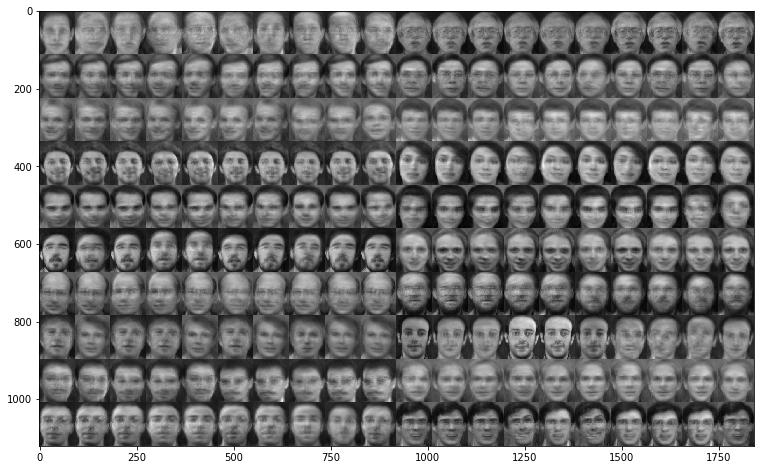

In [91]:
row_number = 10
faces = transform_data(V_tilde, row_number)
imgplot = plt.imshow(faces, cmap=plt.cm.gray)
plt.show()

We can make a grid search in order to obtain the best hyper parameters and the best rank. To do so, we try different values and we take those who give ${\operatorname{max}} \{ \log [ \sum_{i,j} v_{ij} \log \hat{v_{ij}} - \hat{v_{ij}}] \}$ described below. The problem here is computational time. The algorithm needs 28 hours to test 5 values per parameter. We can see the implementation below (but without results).

In [ ]:
params = {
    'beta_w' : [1,5,10,15,20],
    'beta_h' : [1,5,10,15,20],
    'alpha_w' : [10,50,100,150,200],
    'alpha_h' : [10,50,100,150,200],
    'K' : [10,15,20,25,30]
}
norm_min = 0.01
result = []
for i in tqdm(range(5)):
    for j in range(5):
        for t in range(5):
            for r in range(5):
                for l in range(5):
                    K = params['K'][l]
                    hyperpar = {'alpha_w':params['alpha_w'][t], 'alpha_h':params['alpha_h'][r], 
                                'beta_w':params['beta_w'][i], 'beta_h':params['beta_h'][j]}
                    W = np.random.gamma(shape=hyperpar['alpha_w'], scale=1/hyperpar['beta_w'], size=(F,K))
                    H = np.random.gamma(shape=hyperpar['alpha_h'], scale=1/hyperpar['beta_h'], size=(K, N))
                    init = {'W':W, 'H':H}
                    W, H, KL = EM_algorithm(V, K, hyperpar, init, t_max, norm_min)
                    V_tilde = np.dot(W, H)
                    kl = np.log(np.sum(V*np.log(V_tilde) - V_tilde))
                    result.append((params['alpha_w'][t], params['alpha_h'][r], params['beta_w'][i],
                                   params['beta_h'][j], params['K'][l], kl
                                  ))

C:\Users\MTIBAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log
